# What you'll learn

After watching this video, you will be able to:
* Explain what Tekton is.
* Describe how Tekton works.

# What is Tekton?

Let's start by describing **what Tekton is**.
* Tekton is a flexible, open source framework for creating CI/CD pipelines.
* It provides you with a basic set of building blocks that you can use to create CI/CD pipelines, from very simple to very elaborate.
* Tekton allows developers to build, test, and deploy applications automatically.
* It has the ability to run steps in series or in parallel so you are in complete control of the execution sequence.
* Best of all, it works across both cloud providers and on-premises systems.
* So you can use Tekton in your local data center as well as on the cloud.
* Anywhere you can run a Kubernetes cluster, you can run Tekton.

# Benefits of Tekton

Some of the benefits of using Tekton include the following: 
* It offers **standardization**. 
    * Because Tekton is an open source project and it’s vendor neutral.
    * Tekton allows you to standardize your CI/CD tooling and processes across vendors, languages, and deployment environments.
    * Many popular CI/CD tools like **Jenkins X**, **Skaffold**, and **Knative** use **Tekton** as their base.
* Tekton also offers **built-in best practices** because it is logically laid out.
    * You can quickly create CI/CD systems that are scalable, serverless, and best of all, cloud native right out of the box.
    * That means that Tekton runs natively on your Kubernetes cluster, eliminating the need for a separate CI/CD solution.
* Tekton also **maximizes flexibility** in how you design and **customize your CI/CD pipelines**.
    * It satisfies your teams’ needs by abstracting the underlying implementation so that you can choose how to build, test, and deploy applications based on your teams’ requirements.

# Conceptual building blocks

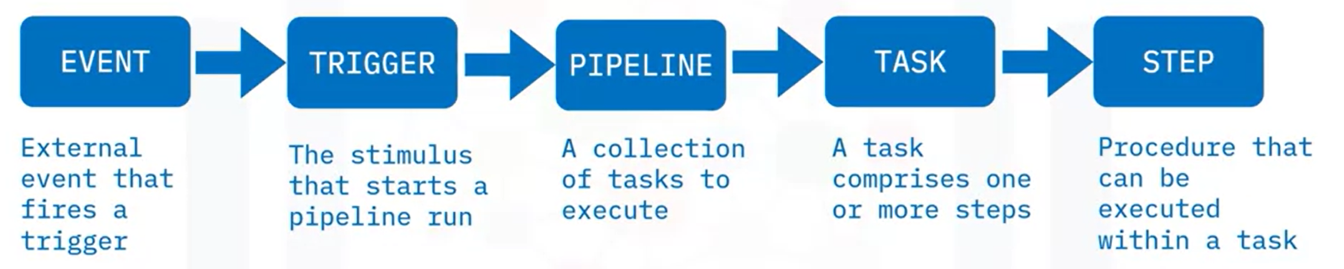

To understand how Tekton works, let’s take a look at a few conceptual building blocks that exemplify the workflow.

**Event**
* There is the concept of an event.
* This is an external event that causes a trigger to fire.
* This might be a `pull` request or a `push` to a Git repository.

**Trigger**
* A trigger is fired by an event and is the stimulus that starts a pipeline run, which executes a pipeline.

**Pipeline**
* Triggers point to pipelines, which are **collections of tasks to execute**.
* There's no limit to the number of tasks you could have in a pipeline.
* These tasks can execute serially or in parallel.

**Task**
* A task is a unit of work that **comprises one or more steps**.
* It can also define **parameters** required to carry out the steps and **workspaces** needed to store artifacts.

**Steps**
* Finally, you have the steps, which are the **actual commands that are executed** to carry out the tasks.
* These can be anything you like, but most often, they are shell scripts that execute commands to build, test, and deploy applications.

# Physical building blocks

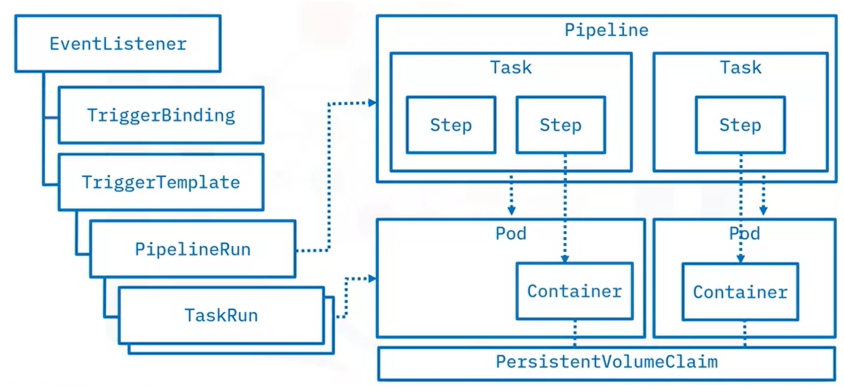

Now that you’ve seen how Tekton works conceptually. A closer look reveals that **Tekton is a set of Kubernetes custom resource definitions** (`CRDs`). Let's explain each one in order of execution.

**EventListener**:
* To handle events, you have a CRD called `EventListener` that listens for events like pull requests or commits on a Git repository.
* Events are associated with two other CRDs called `TriggerBinding` and `TriggerTemplate`.

**TriggerBinding**: The `TriggerBinding` captures parameters from the event that are required to run the pipeline.

**TriggerTemplate**:
* `TriggerTemplate` takes the parameters from the `TriggerBinding` and associates them with the `PipelineRun`.
* When triggered by an event, the `TriggerTemplate` creates a `PipelineRun`, passing along any parameters from the triggered event, or persistent storage, that the pipeline might need.
* It's important to note that **you could also manually create `PipelineRuns`** and not use events, but CI/CD pipelines are usually driven by events.

**PipelineRun**:
* The `PipelineRun` is what **instantiates a `pipeline`**.
* **A `pipeline` is a collection of `tasks`**.
* These **`tasks` can run in parallel**, at the same time, which is the default.
* The **`tasks` can also run serially**, one after the other, if you specify dependencies between them.
* Each `task` comprises a series of `steps`.
* The `steps` run in the sequence specified in the task.

**TaskRun**:
* When a pipeline executes, the `PipelineRun` CRD is responsible for managing the tasks.
* It does this by creating a `TaskRun` for each task, which, in turn, creates a **Kubernetes `pod` for the task** to run in.
* **All the steps for a task run in the same pod**.
* As the **steps are executed as a container in the pod**, one for each step to run in.
* If the tasks are running in parallel, the containers for each task will be created at once, as in this example.

**PersistentVolumeClaim**:
* Usually, a **PersistentVolumeClaim** is created, and **the storage is attached to all the pods** so that they can share artifacts throughout the `pipeline`.
* This allows you to check out code in one task, run unit tests on it in another task, and create a container image from it in yet another task.
* Most pipelines require some form of persistent storage.
* Since **steps are always run in series**, the **containers will be created one at a time**, each one starting when the previous one ends.

> **Everything about Tekton is Kubernetes native.**
> * Everything is running in your Kubernetes cluster with no external CI/CD servers required.
> * This is one of the things that makes Tekton the perfect technology for CI/CD with Kubernetes.

# Summary

You learned that:
* Tekton is a flexible, open source framework for creating CI/CD pipelines.
* There are several benefits to using **Tekton within your CI/CD pipeline**.
* The conceptual building blocks of Tekton are **events**, **triggers**, **pipelines**, **tasks**, and **steps**.
* The physical building blocks of Tekton are a set of Kubernetes **custom resource definitions (CRDs)**.